In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../GillesPy2/')))
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../GillesPy2/test')))

In [2]:
import gillespy2

In [3]:
import example_models

In [4]:
from matplotlib import pyplot as plt
import time

In [5]:
dir(example_models)

['AssignmentRule',
 'Event',
 'EventAssignment',
 'EventTrigger',
 'FunctionDefinition',
 'Model',
 'Parameter',
 'RateRule',
 'Reaction',
 'Species',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'create_decay',
 'create_decay_no_tspan',
 'create_degradation',
 'create_dimerization',
 'create_lac_operon',
 'create_michaelis_menten',
 'create_multi_firing_event',
 'create_oregonator',
 'create_robust_model',
 'create_schlogl',
 'create_toggle_switch',
 'create_trichloroethylene',
 'create_tyson_2_state_oscillator',
 'create_vilar_oscillator',
 'np']

In [6]:
all_example_models = [
 'create_decay',
 'create_degradation',
 'create_dimerization',
 'create_lac_operon',
 'create_michaelis_menten',
 'create_multi_firing_event',
 'create_oregonator',
 'create_robust_model',
 'create_schlogl',
 'create_toggle_switch',
 'create_trichloroethylene',
 'create_tyson_2_state_oscillator',
 'create_vilar_oscillator',
]

In [29]:
all_solvers = {
 'CLESolver': gillespy2.solvers.numpy.CLE_solver.CLESolver,
 'NumPySSASolver': gillespy2.solvers.numpy.ssa_solver.NumPySSASolver,
 'ODECSolver': gillespy2.solvers.cpp.ode_c_solver.ODECSolver,
 'ODESolver': gillespy2.solvers.numpy.ode_solver.ODESolver,
 'SSACSolver': gillespy2.solvers.cpp.ssa_c_solver.SSACSolver,
 'TauHybridCSolver': gillespy2.solvers.cpp.tau_hybrid_c_solver.TauHybridCSolver,
 'TauHybridSolver': gillespy2.solvers.numpy.tau_hybrid_solver.TauHybridSolver,
 'TauLeapingCSolver': gillespy2.solvers.cpp.tau_leaping_c_solver.TauLeapingCSolver,
 'TauLeapingSolver': gillespy2.solvers.numpy.tau_leaping_solver.TauLeapingSolver,
 'StochKit' : gillespy2.solvers.stochkit.StochKitSolver
}


In [9]:
import gillespy2.solvers.stochkit

In [10]:
stochkit_sol = gillespy2.solvers.stochkit.StochKitSolver()

In [11]:
stochkit_ode_sol = gillespy2.solvers.stochkit.StochKitODESolver()

In [14]:
#model = example_models.create_michaelis_menten()
model = example_models.create_vilar_oscillator()

In [15]:
%time stochkit_sol = gillespy2.solvers.stochkit.StochKitSolver()

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 10.7 µs


In [17]:
%%time
r = stochkit_sol.run(model=model, 
                     number_of_trajectories=100,
                     t = model.tspan[-1], 
                     incriment=(model.tspan[1]-model.tspan[0]), 
                     stochkit_home=os.environ['HOME']+'/StochKit/')

CPU times: user 2.6 s, sys: 24.2 ms, total: 2.63 s
Wall time: 9.77 s


In [33]:
def time_run_solver(sname, model):
    if sname == 'StochKit':
        start_time = time.perf_counter()  
        stochkit_sol = gillespy2.solvers.stochkit.StochKitSolver()

        r = stochkit_sol.run(model=model, 
                             t = model.tspan[-1], 
                             incriment=(model.tspan[1]-model.tspan[0]), 
                             stochkit_home=os.environ['HOME']+'/StochKit/')
        end_time= time.perf_counter()
        return end_time - start_time
    else:
        start_time = time.perf_counter()  
        sol = all_solvers[sname](model=model)
        r = sol.run()
        end_time= time.perf_counter()
        return end_time - start_time


In [26]:
time_run_solver('SSACSolver', model)

3.0633025330025703

In [34]:
time_run_solver('StochKit', model)

0.04327188801835291

In [51]:
len(r[0][0])

401

In [54]:
model.tspan.items

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [80]:
r[0][0][1]

array([  0.05, 296.  , 115.  ,   5.  ,   0.  ])

In [ ]:
pl

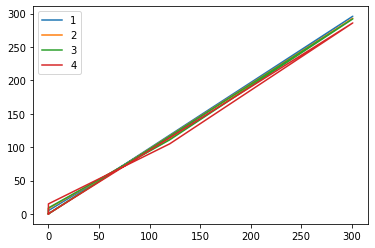

In [71]:
for i in range(1,r[0][0].shape[1]):
    plt.plot(r[0][0][0], r[0][0][i], label=i)
plt.legend()

In [60]:
r[0][0]r[0][0].ndim

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [58]:
print(r[0][0])

[[  0.   301.   120.     0.     0.  ]
 [  0.05 296.   115.     5.     0.  ]
 [  0.1  293.   112.     8.     0.  ]
 ...
 [ 19.9  174.    82.    38.    89.  ]
 [ 19.95 176.    85.    35.    90.  ]
 [ 20.   177.    86.    34.    90.  ]]


In [18]:
#print(model)

In [30]:
list(all_solvers.keys())

['CLESolver',
 'NumPySSASolver',
 'ODECSolver',
 'ODESolver',
 'SSACSolver',
 'TauHybridCSolver',
 'TauHybridSolver',
 'TauLeapingCSolver',
 'TauLeapingSolver',
 'StochKit']

In [37]:
for m in all_example_models:
    model = eval(f"example_models.{m}()")
    print(model.name)
    for sol in ['StochKit','SSACSolver']:
        print(f"\t{sol} {time_run_solver(sol,model)}")


Example
	StochKit 0.038318712991895154
	SSACSolver 3.367130001017358
Degradation
	StochKit 0.06023914599791169
	SSACSolver 3.385716680000769
Dimerization
	StochKit 0.06055352202383801
	SSACSolver 3.413833315978991
LacOperon


SimulationError: Error running simulation: /tmp/tmp79cns5fd/temp_input_2795d5b2-b8e3-4168-a6c2-846725d3b959_generated_code/compile-log.txt
g++: error: /home/brian/StochKit/obj/Random.o: No such file or directory
g++: error: /home/brian/StochKit/obj/Parameter.o: No such file or directory
g++: error: /home/brian/StochKit/obj/CommandLineInterface.o: No such file or directory
g++: error: /home/brian/StochKit/obj/StandardDriverUtilities.o: No such file or directory
g++: error: /home/brian/StochKit/obj/StringCalculator.o: No such file or directory
make: *** [Makefile:127: ssa_direct_mixed_small_compiled] Error 1



In [20]:
model.name

'Example'